## EDA for Billionaires Statistics

In [1]:
import pandas as pd
billionaires = pd.read_csv('../Billionaires Statistics Dataset.csv')
columns = ['personName', 'source', 'age', 'finalWorth', 'gender', 'country', 'industries']
data = billionaires[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2640 non-null   object 
 1   source      2640 non-null   object 
 2   age         2575 non-null   float64
 3   finalWorth  2640 non-null   int64  
 4   gender      2640 non-null   object 
 5   country     2602 non-null   object 
 6   industries  2640 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 144.5+ KB


In [2]:
missed = data.isnull().mean() * 100
missed = missed.map('{:.2f}%'.format)
print(missed)

personName    0.00%
source        0.00%
age           2.46%
finalWorth    0.00%
gender        0.00%
country       1.44%
industries    0.00%
dtype: object


In [3]:
data = data.dropna()
missed = data.isnull().mean() * 100
missed = missed.map('{:.2f}%'.format)
print(missed)

personName    0.00%
source        0.00%
age           0.00%
finalWorth    0.00%
gender        0.00%
country       0.00%
industries    0.00%
dtype: object


In [4]:
wealthiest_individual = data.loc[data['finalWorth'].idxmax()]
youngest_individual = data.loc[data['age'].idxmin()]
wealthiest_source = data.groupby('source')['finalWorth'].sum().reset_index()
wealthiest_source = wealthiest_source.loc[wealthiest_source['finalWorth'].idxmax()]

print('Wealthiest Individual:')
print(wealthiest_individual[['personName', 'finalWorth', 'age', 'source']])

print('\nYoungest Individual:')
print(youngest_individual[['personName', 'age', 'finalWorth', 'source']])

print('\nWealthiest Source:')
print(wealthiest_source)

Wealthiest Individual:
personName    Bernard Arnault & family
finalWorth                      211000
age                               74.0
source                            LVMH
Name: 0, dtype: object

Youngest Individual:
personName    Clemente Del Vecchio
age                           18.0
finalWorth                    3500
source                   Eyeglases
Name: 823, dtype: object

Wealthiest Source:
source        Real estate
finalWorth         522400
Name: 657, dtype: object


In [5]:
import altair as alt
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

top_10_countries = country_counts.nlargest(10, 'count')

total_top_10_billionaires = top_10_countries['count'].sum()

top_10_countries['percentage'] = (top_10_countries['count'] / total_top_10_billionaires) * 100

pie_chart = alt.Chart(top_10_countries).mark_arc().encode(
    theta=alt.Theta(field='percentage', type='quantitative', title='Percentage (%)'),
    color=alt.Color(field='country', type='nominal', 
                    scale=alt.Scale(domain=top_10_countries['country']),
                    title='Country'),
    tooltip=['country:N', 'count:Q', 'percentage:Q']
).properties(
    title='Top 10 Countries by Billionaire Count' 
).configure_view(
    stroke=None
)

pie_chart.show()

alt.Chart(...)

/var/folders/5n/rq1tl9hd4k76sz1wqg3hp4g00000gn/T/ipykernel_85663/3956901436.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count', data=top_10_countries, palette='viridis')


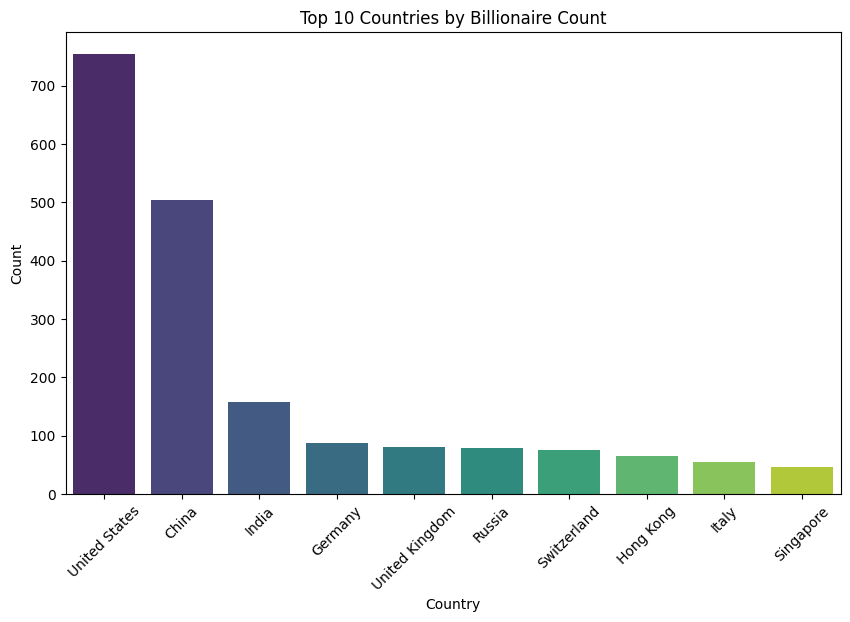

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

top_10_countries = country_counts.nlargest(10, 'count')

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', data=top_10_countries, palette='viridis')

plt.title('Top 10 Countries by Billionaire Count')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

In [6]:
import pandas as pd
import altair as alt

selected_country = 'United States'
country_data = data[data['country'] == selected_country]

source_wealth = country_data.groupby('source')['finalWorth'].sum().reset_index()
source_wealth.columns = ['source', 'total_wealth']

top_sources = source_wealth.nlargest(5, 'total_wealth')

total_wealth = top_sources['total_wealth'].sum()
top_sources['percentage'] = (top_sources['total_wealth'] / total_wealth) * 100
pie_chart = alt.Chart(top_sources).mark_arc().encode(
    theta=alt.Theta(field='total_wealth', type='quantitative', title='Total Wealth'), 
    color=alt.Color(field='source', type='nominal', 
                    scale=alt.Scale(domain=top_sources['source']), 
                    title='Wealth Source'), 
    tooltip=[
        alt.Tooltip('source:N', title='Wealth Source'),
        alt.Tooltip('total_wealth:Q', title='Total Wealth'),
        alt.Tooltip('percentage:Q', title='Percentage', format='.2f')
        ] 
    ).properties(title=f'Top 5 Wealth Sources in {selected_country}').configure_view(stroke=None)
pie_chart.show()


alt.Chart(...)

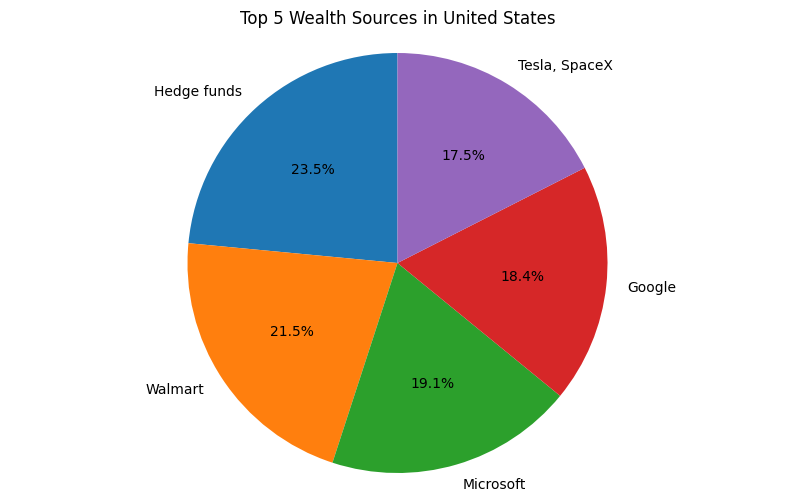

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

selected_country = 'United States'
country_data = data[data['country'] == selected_country]

source_wealth = country_data.groupby('source')['finalWorth'].sum().reset_index()
source_wealth.columns = ['source', 'total_wealth']

top_sources = source_wealth.nlargest(5, 'total_wealth')

total_wealth = top_sources['total_wealth'].sum()
top_sources['percentage'] = (top_sources['total_wealth'] / total_wealth) * 100

plt.figure(figsize=(10, 6))
plt.pie(top_sources['total_wealth'], 
        labels=top_sources['source'], 
        autopct='%1.1f%%', 
        startangle=90)

plt.title(f'Top 5 Wealth Sources in {selected_country}')
plt.axis('equal')
plt.show()

In [7]:
age_distribution = alt.Chart(country_data).mark_bar().encode(
    x=alt.X('age:Q', bin=alt.Bin(maxbins=20), title='Age'),
    y=alt.Y('count():Q', title='Count'), 
    tooltip=['age:Q', 'count():Q']  
).properties(
    title='Age Distribution of Billionaires in the United States' 
).configure_view(
    stroke=None
)
age_distribution.show()

alt.Chart(...)

/var/folders/5n/rq1tl9hd4k76sz1wqg3hp4g00000gn/T/ipykernel_85663/2921151519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution[age_distribution['count'] > 0]['age'],


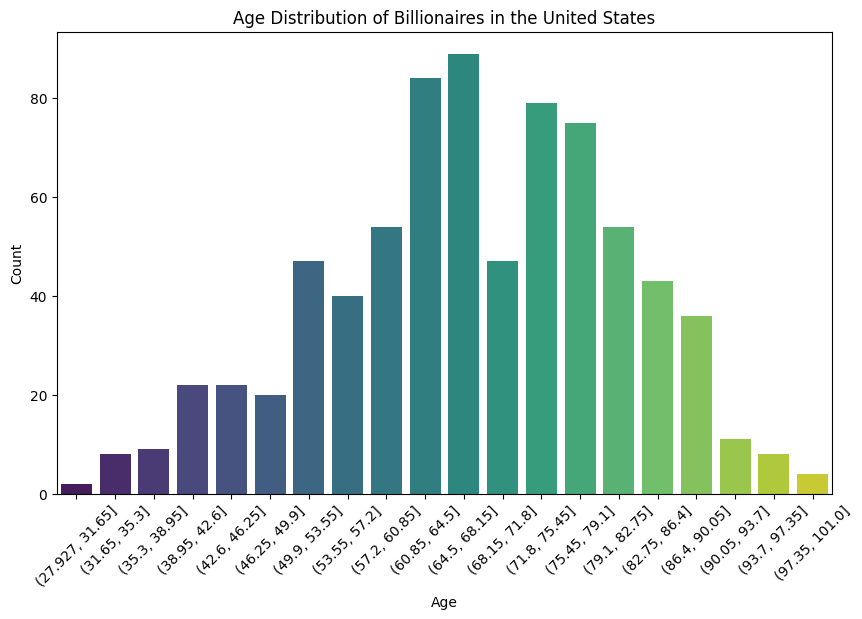

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
age_bins = pd.cut(country_data['age'], bins=20)
age_distribution = country_data.groupby(age_bins).size().reset_index(name='count')

sns.barplot(x=age_distribution[age_distribution['count'] > 0]['age'], 
            y=age_distribution['count'], 
            palette='viridis')

plt.title('Age Distribution of Billionaires in the United States')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [8]:
top10_richest = country_data.nlargest(10, 'finalWorth')[['personName', 'finalWorth']]

chart = alt.Chart(top10_richest).mark_bar().encode(
    x=alt.X('finalWorth:Q', title='Wealth'),
    y=alt.Y('personName:N', title='Name', sort='-x'),
    tooltip=['personName:N', 'finalWorth:Q']
).properties(
    title='Top 10 Billionaires'
)
chart.show()

alt.Chart(...)

/var/folders/5n/rq1tl9hd4k76sz1wqg3hp4g00000gn/T/ipykernel_85663/1658170869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='finalWorth', y='personName', data=top10_richest, palette='viridis')


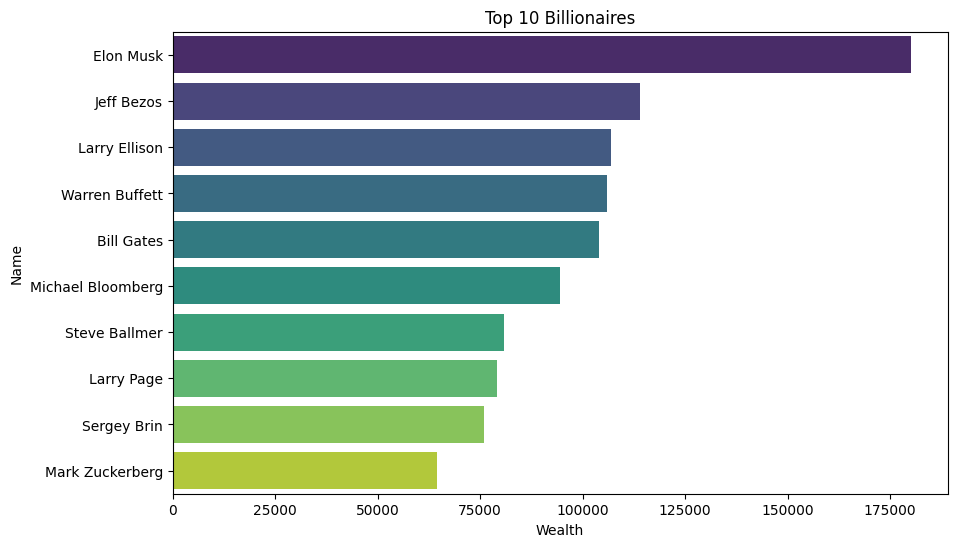

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top10_richest = country_data.nlargest(10, 'finalWorth')[['personName', 'finalWorth']]

plt.figure(figsize=(10, 6))
sns.barplot(x='finalWorth', y='personName', data=top10_richest, palette='viridis')

plt.title('Top 10 Billionaires')
plt.xlabel('Wealth')
plt.ylabel('Name')
plt.show()